
# **The Essentials of Time Series Analysis**


* Basic Smoothing Models: Simple Moving Averages, Pandas Exponential Weighted 
* Holt Winters method for Single, Double and Triple Exponential Smoothing
* Forecast into the real future using Holt Winters Triple Exponential method

Dataset : airline_passengers.csv







In [ ]:
# linearalgebra and dataframes
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#timeseries decomposition
from statsmodels.tsa.seasonal import seasonal_decompose # Error Trend Seasonality decomposition

# holt winters 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing

# consistent plot size wherever not specifiied
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 12


In [ ]:
airline_data = pd.read_csv("airline_passengers.csv", index_col = "Month", parse_dates = True)
airline_data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# decompose the time series
decompose_result = seasonal_decompose(airline_data['Thousands of Passengers'],model='multiplicative')

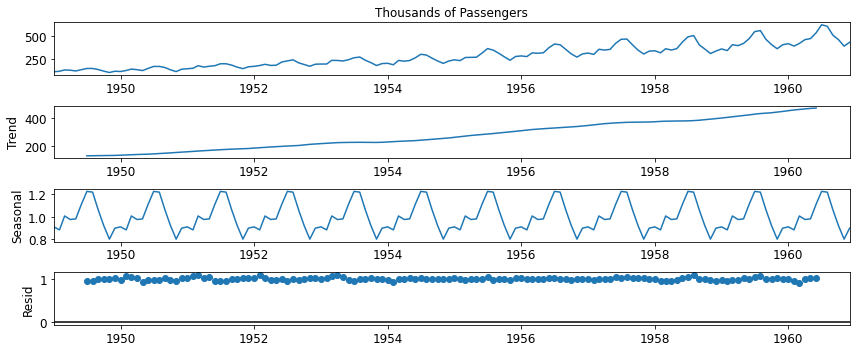

In [ ]:
#Plot the result (Note: by default it gets plotted twice. To prevent it, here we add semicolon at the end of the plot function.
decompose_result.plot();


## I. Basic smoothing models 

### Simple Moving Averages

In [ ]:
#Fitting Simple Moving Averages

airline_data.dropna(inplace=True)
airline_data['6-month-SMA'] = airline_data['Thousands of Passengers'].rolling(window=6).mean()
airline_data['12-month-SMA'] = airline_data['Thousands of Passengers'].rolling(window=12).mean()
airline_data.head(12)


,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


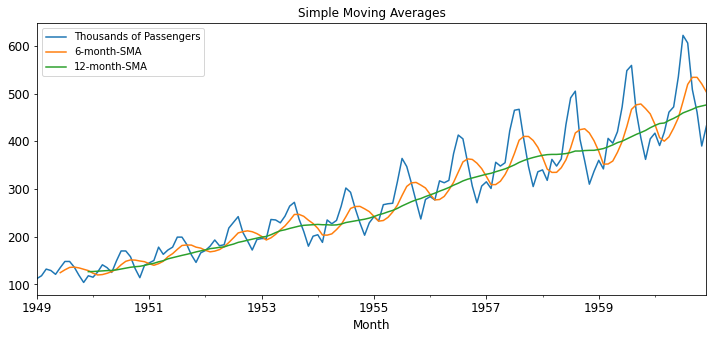

In [ ]:
airline_data.plot(title='Simple Moving Averages');

Note: Rolling introduces the NaN depending on the window size selected. 

Disadvantages of Simple Moving Averages------

Smaller windows will lead to more noise, rather than signal

It will always lag by the size of the window (see the MA starts after a certain lag above in the figure)

It will never reach to full peak or valley of the data due to the averaging.

Does not really inform you about possible future behavior, all it really does is describe trends in your data.

Extreme historical values can skew your SMA significantly.

To help fix some of these problems, we have the EWMA or the Exponentially Weighted Moving Average




### Exponential Weighted Moving Averages

Note: EWMA applies Single Exponential Smoothing. EWMA alows to reduce the lag by putting more weight to the recent readings or values. The amount of weight applied is dependent on the actual parameters in the EWMA and the number of periods given in a window size. 

In [ ]:
airline_data['ewma12'] = airline_data['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

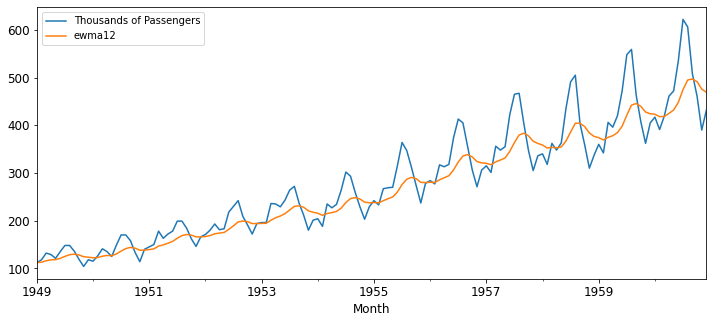

In [ ]:
airline_data[['Thousands of Passengers','ewma12']].plot();

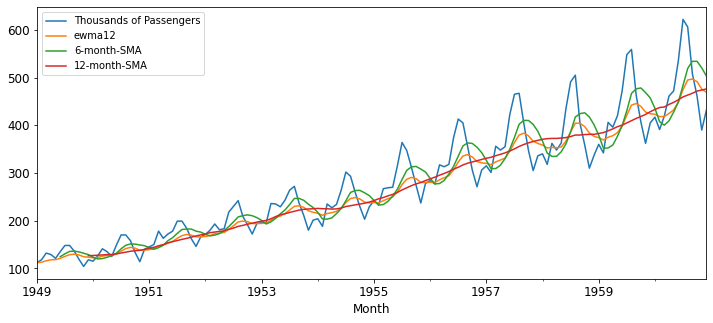

In [ ]:
#Comparing SMA and EWMA

airline_data[['Thousands of Passengers','ewma12','6-month-SMA','12-month-SMA']].plot();

## II. Holt Winters - Simple, Double and Triple Exponential Smoothing

Moving Averages and Single Exponential Smoothing does a poor job of forecasting when there is trend and seasonality in the data. Double and Triple exponential smoothing is best suited for this kind of timeseries data.Holt winters has all the three variations - Single, Double and Triple exponential smoothing.

Double Exponential smoothing uses a smoothing factor that addresses trend. Triple Exponential smoothing uses a smoothing factor that addresses seasonality.


In [ ]:
# set the span and the smoothing factor alpha 
#Span corresponds to what is commonly called an “N-day EW moving average”.
span = 12
#Alpha specifies the smoothing factor directly.
alpha = 2/(span+1)

In [ ]:
airline_data.columns

Index(['Thousands of Passengers', '6-month-SMA', '12-month-SMA', 'ewma12'], dtype='object')

In [ ]:
#To work with forecasting models like Holt Winters, ARIMA, SARIMA etc., the datetime index frequency needs to be set.
# The Airline passenger dataset index indicates dates on the start of the month. Hence we can set this as 'MS'

airline_data.index.freq = 'MS' 
airline_data.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,ewma12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,118.359861


In [ ]:
airline_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

### Simple Exponential Smoothing using Holt Winters

In [ ]:
#Note: This is same as ewm method in Pandas
airline_data['SES12'] = SimpleExpSmoothing(airline_data['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
airline_data.head()
#NOTE: For some reason, when optimized=False is passed into .fit(), the statsmodels SimpleExpSmoothing function shifts fitted values down one row. 
#We fix this by adding .shift(-1) after .fittedvalues above

,Thousands of Passengers,6-month-SMA,12-month-SMA,ewma12,SES12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,112.923077,112.923077
1949-03-01,132,NaN,NaN,115.857988,115.857988
1949-04-01,129,NaN,NaN,117.879836,117.879836
1949-05-01,121,NaN,NaN,118.359861,118.359861


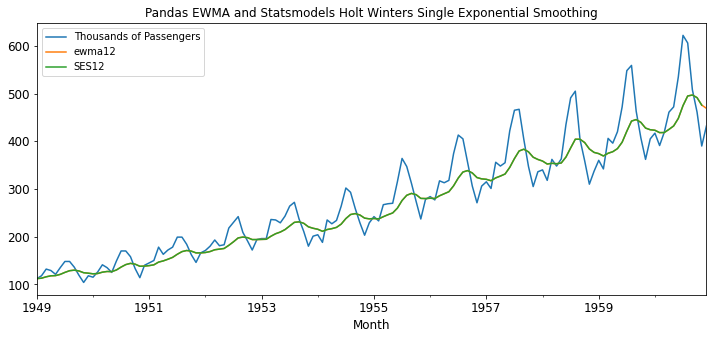

In [ ]:
airline_data[['Thousands of Passengers','ewma12','SES12']].plot(title='Pandas EWMA and Statsmodels Holt Winters Single Exponential Smoothing');
#Both the EWMA and Holt Winters Single Exponential Smoothing curve fit each other completely.

### Double Exponential Smoothing using Holt Winters

In [ ]:
airline_data['DES12'] = ExponentialSmoothing(airline_data['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


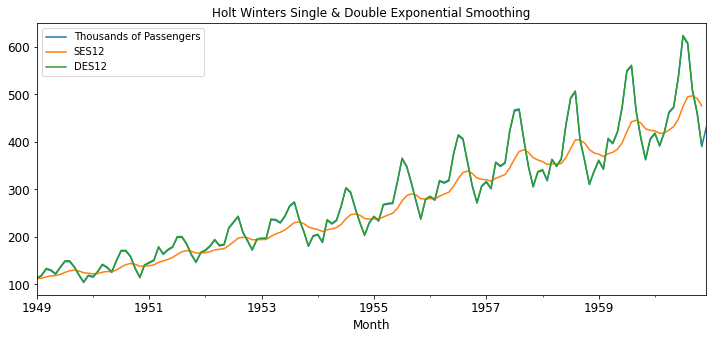

In [ ]:
airline_data[['Thousands of Passengers','SES12','DES12']].plot(title='Holt Winters Single & Double Exponential Smoothing');

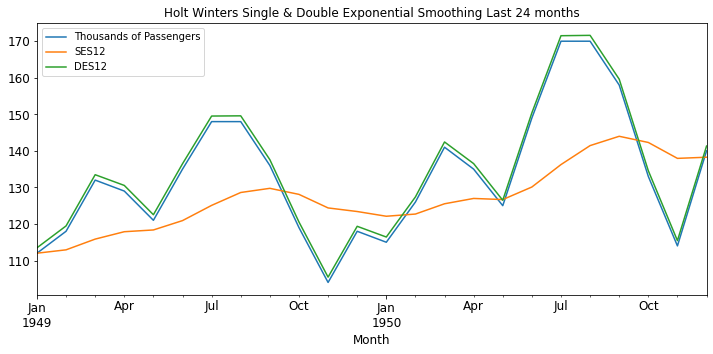

In [ ]:
#The double exponential smoothing completely overlaps on the original data. 
#Let's plot for the last 24 months.

airline_data[['Thousands of Passengers','SES12','DES12']].iloc[:24].plot(title='Holt Winters Single & Double Exponential Smoothing Last 24 months').autoscale(axis='x',tight=True);


In [ ]:
#Replotting the above using the multiplicative adjustment instead of additive.
airline_data['DES12_mul'] = ExponentialSmoothing(airline_data['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


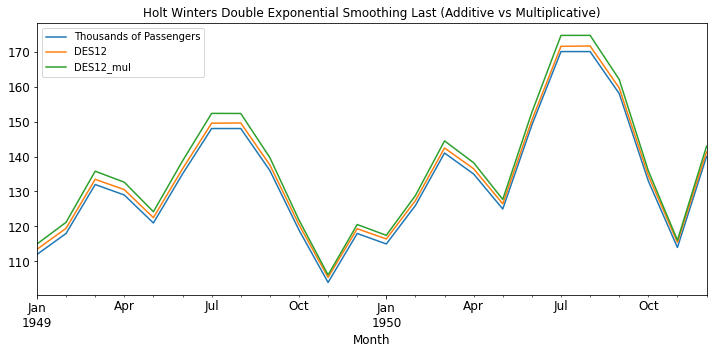

In [ ]:
airline_data[['Thousands of Passengers','DES12','DES12_mul']].iloc[:24].plot(title='Holt Winters Double Exponential Smoothing Last (Additive vs Multiplicative)').autoscale(axis='x',tight=True);

### Triple Exponential Smoothing using Holt Winters

In [ ]:
airline_data['TESadd12'] = ExponentialSmoothing(airline_data['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline_data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


,Thousands of Passengers,6-month-SMA,12-month-SMA,ewma12,SES12,DES12,DES12_mul,TESadd12
Month,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,113.474828,114.978251,112.001172
1949-02-01,118,NaN,NaN,112.923077,112.923077,119.464366,121.191659,120.168193
1949-03-01,132,NaN,NaN,115.857988,115.857988,133.477561,135.802180,134.698694
1949-04-01,129,NaN,NaN,117.879836,117.879836,130.543312,132.657709,131.376310
1949-05-01,121,NaN,NaN,118.359861,118.359861,122.528126,124.213566,124.628035


In [ ]:
airline_data['TESmul12'] = ExponentialSmoothing(airline_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


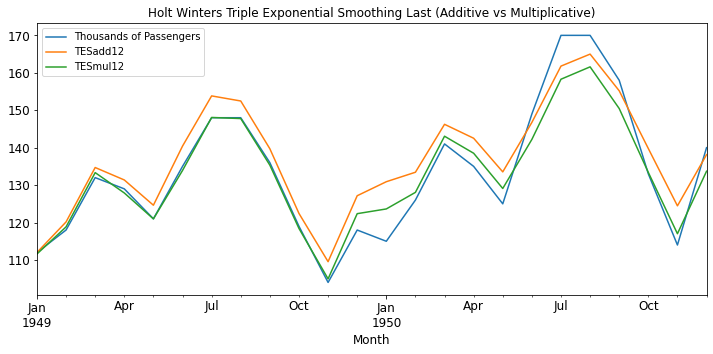

In [ ]:
airline_data[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(title='Holt Winters Triple Exponential Smoothing Last (Additive vs Multiplicative)').autoscale(axis='x',tight=True);

## III. Forecasting with Holt Winters Method

In [ ]:
#Reading the airline data again

airline_data  = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline_data.index.freq = 'MS'
airline_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [ ]:
airline_data.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
# Number of months of data 
len(airline_data)

144

In [ ]:
# Split into train and test set
train_airline_data = airline_data[:108] 
test_airline_data = airline_data[108:] 

In [ ]:
len(test_airline_data)

36

In [ ]:
#Fit the model on the train set. Seasonal periods with value 12 indicates the seasonality we expect in the data. 
#For airline passenger we can safely assume that the seasonality would repeat every 12 months.

fitted_model = ExponentialSmoothing(train_airline_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
test_predictions = fitted_model.forecast(36).rename('HW Test Forecast')
test_predictions[:10]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1958-01-01    356.968606
1958-02-01    344.588774
1958-03-01    405.718292
1958-04-01    400.610774
1958-05-01    409.001622
1958-06-01    480.694200
1958-07-01    530.470095
1958-08-01    523.288631
1958-09-01    454.210643
1958-10-01    392.518136
Freq: MS, Name: HW Test Forecast, dtype: float64

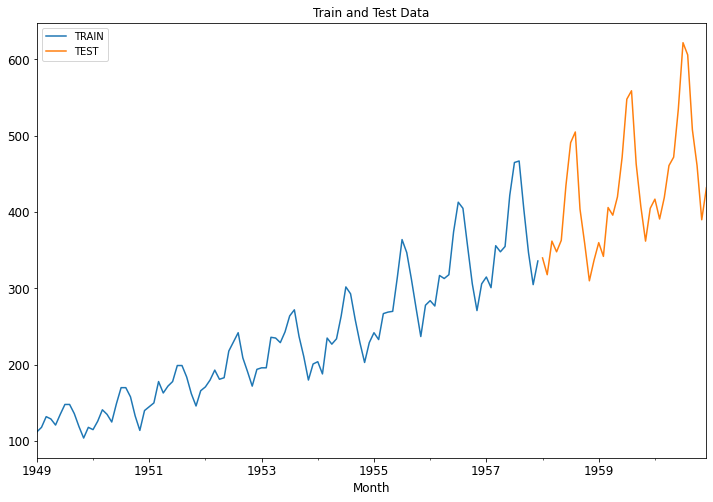

In [ ]:
train_airline_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_airline_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
plt.title('Train and Test Data');

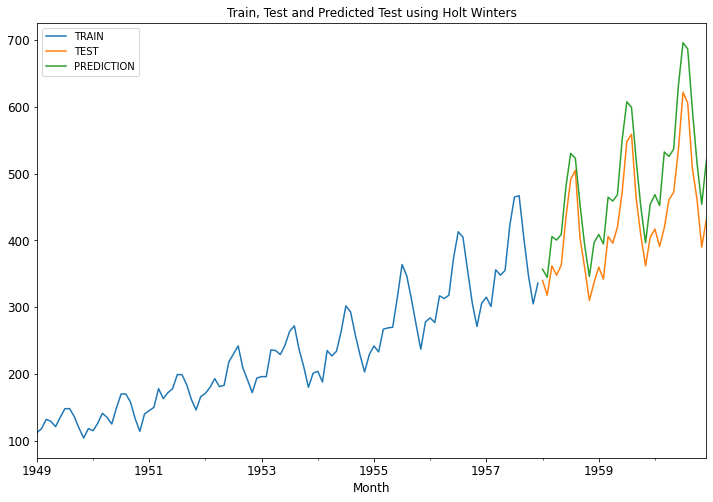

In [ ]:
#Next we will plot also the predicted test data

train_airline_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_airline_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');

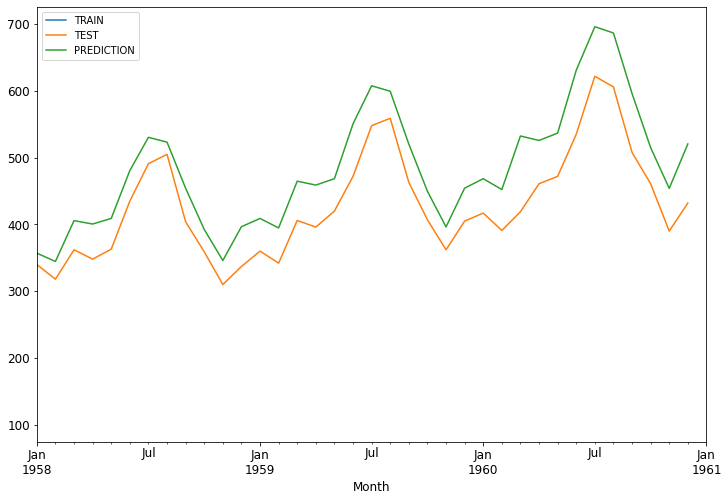

In [ ]:
#Plot the recent rows

train_airline_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_airline_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## IV. Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
print(f'Mean Absolute Error = {mean_absolute_error(test_airline_data,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_airline_data,test_predictions)}')
test_airline_data.describe()

# The MAE is very less compared to the mean of the true test data, which looks good.

Mean Absolute Error = 55.69801502960201
Mean Squared Error = 3525.891936898888


,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## V. Forecast into the future


In [ ]:
final_model = ExponentialSmoothing(airline_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
forecast_predictions = final_model.forecast(steps=36)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


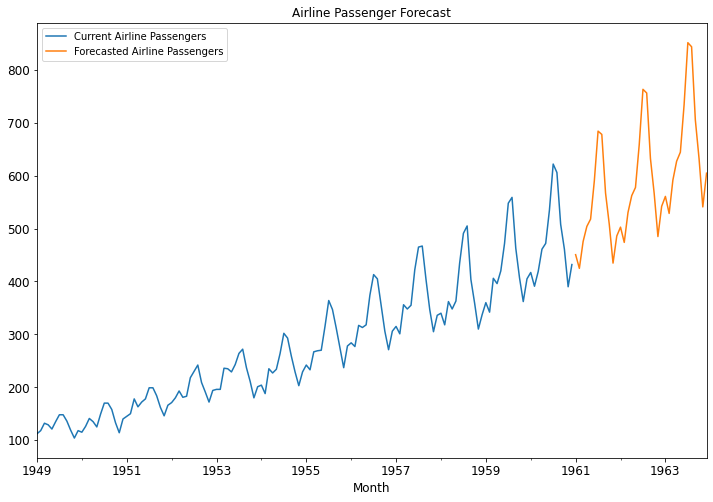

In [ ]:
airline_data['Thousands of Passengers'].plot(figsize=(12,8),legend=True,label='Current Airline Passengers')
forecast_predictions.plot(legend=True,label='Forecasted Airline Passengers')
plt.title('Airline Passenger Forecast');
#Note : There are many other considerations to be taken while modeling with time series data like lagging, stationarity etc. 